## THE SPARKS FOUNDATION INTERNSHIP

# Task 7: Stock Market Prediction using Numerical and Textual Analysis



# Author : Jyoti Pandey

### **Problem Statement**: Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.
**Stock to analyze and predict** - SENSEX (S&P BSE SENSEX)


## *Importing the libraries* 

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import datetime
#!pip install textblob
from textblob import TextBlob
#!pip install lightgbm
import lightgbm
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as vader
from pandas.plotting import andrews_curves
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

### ***Importing and reading the dataset***

###### *Dataset_1(Stock Price)*

In [2]:
stock_price = pd.read_csv('^BSESN.csv')
stock_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,5.8125,5.8125,5.5000,5.6250,5.077073,49600
1,2000-01-04,5.6250,5.6250,5.1250,5.2500,4.738605,123000
2,2000-01-05,5.4375,5.4375,5.1875,5.1875,4.682192,29800
3,2000-01-06,5.1875,5.3750,5.0625,5.3750,4.851428,162600
4,2000-01-07,5.5000,5.5000,5.1875,5.3125,4.795016,27400


In [3]:
#To check the no. of rows and columns.
stock_price.shape

(5335, 7)

In [4]:
#To check the no. of elements.
stock_price.size

37345

In [5]:
#Checking null count for each column
stock_price.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
# dropping duplicates in data
stock_price = stock_price.drop_duplicates()

In [7]:
#Converting Date column to datetime datatype
stock_price['Date'] = pd.to_datetime(stock_price['Date'], format= '%Y-%m-%d')
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5335 entries, 0 to 5334
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5335 non-null   datetime64[ns]
 1   Open       5335 non-null   float64       
 2   High       5335 non-null   float64       
 3   Low        5335 non-null   float64       
 4   Close      5335 non-null   float64       
 5   Adj Close  5335 non-null   float64       
 6   Volume     5335 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 333.4 KB


### *Visualizing Data*

Mean:  11.066835988753514 
Median:  5.82 
Mode:  4.51


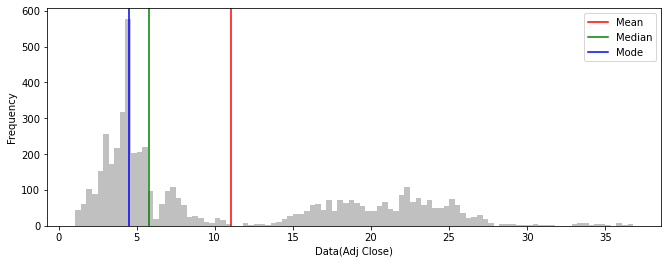

In [8]:
#statistical analysis
data = round(stock_price['Adj Close'],2)
mean = data.mean()
median = data.median()
mode = data.mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])
plt.figure(figsize=(11,4))
plt.hist(data,bins=100,color='silver')
plt.axvline(mean,color='r',label='Mean')
plt.axvline(median,color='g',label='Median')
plt.axvline(mode[0],color='b',label='Mode')
plt.xlabel('Data(Adj Close)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [9]:
stock_price['Fluctuations'] = np.where(stock_price['Volume'].shift(-1) > stock_price['Volume'],'Rise','Fall')

In [10]:
stock_price['Returns'] = stock_price['Adj Close'].pct_change()
stock_price = stock_price.dropna()
stock_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Fluctuations,Returns
1,2000-01-04,5.6250,5.6250,5.1250,5.2500,4.738605,123000,Fall,-0.066666
2,2000-01-05,5.4375,5.4375,5.1875,5.1875,4.682192,29800,Rise,-0.011905
3,2000-01-06,5.1875,5.3750,5.0625,5.3750,4.851428,162600,Fall,0.036145
4,2000-01-07,5.5000,5.5000,5.1875,5.3125,4.795016,27400,Fall,-0.011628
5,2000-01-10,5.0625,5.3125,5.0625,5.1875,4.682192,20000,Rise,-0.023529


<AxesSubplot:ylabel='Adj Close'>

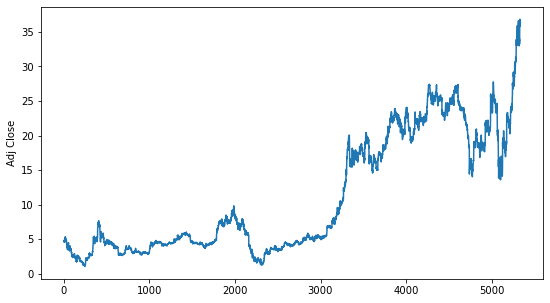

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 5)
sns.lineplot(stock_price.index ,stock_price['Adj Close'])

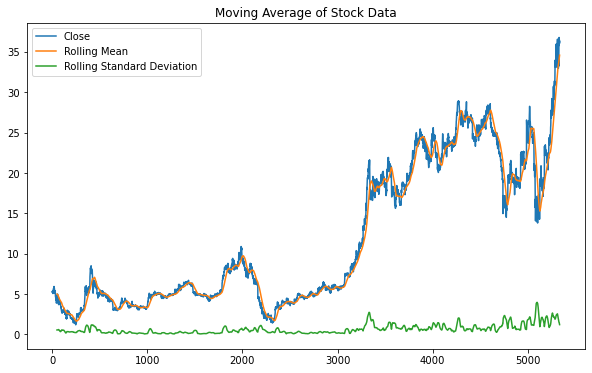

In [12]:
#Moving Average
TITLE='Moving Average of Stock Data'
close = stock_price['Close']
m_avg = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(10,6))
plt.title(TITLE)
stock_price['Close'].plot(label = 'Close')
m_avg.plot(label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()

Text(0.5, 1.0, 'Returns')

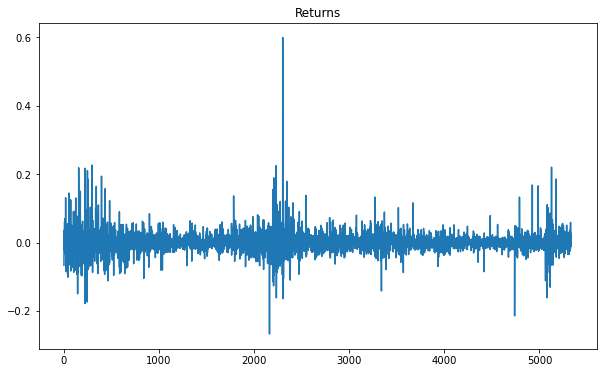

In [13]:
#Plotting returns
plt.figure(figsize = (10,6))
stock_price['Returns'].plot(label='Return')
plt.title("Returns")

<AxesSubplot:>

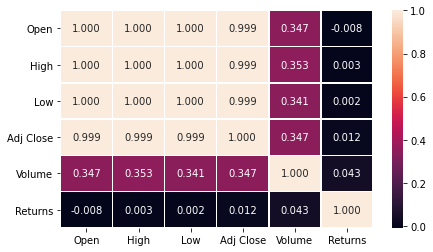

In [14]:
#Heatmap
f,ax = plt.subplots(figsize=(7,4))
sns.heatmap(stock_price[['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Returns']].corr(), 
            annot=True, linewidths=.5, fmt= '.3f',ax=ax)

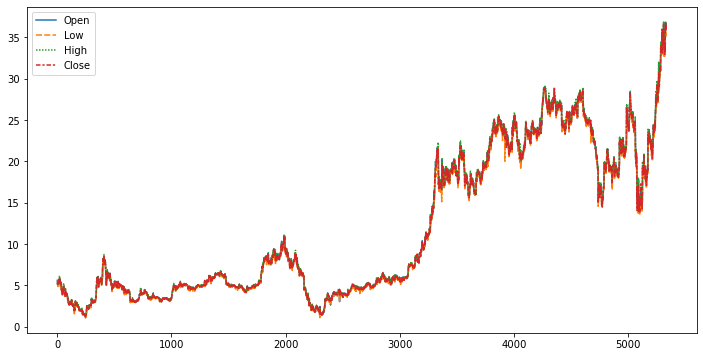

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
ax = sns.lineplot(data=stock_price[['Open', 'Low', 'High', 'Close']])

<AxesSubplot:>

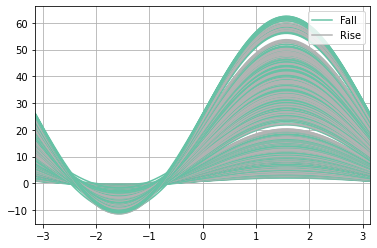

In [16]:
#Andrew Curve
andrews_curves(stock_price[['Open', 'Close', 'Fluctuations']], "Fluctuations",colormap='Set2')


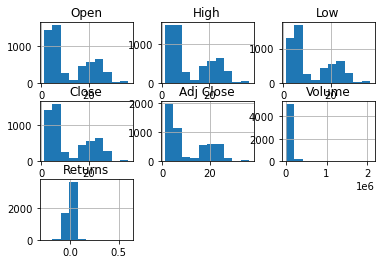

In [17]:
# Histograms
h=stock_price.hist()
plt.show()
#plt.h

#### *Dataset_2(News Headlines)*

In [18]:
news_headlines= pd.read_csv('india-news-headlines.csv')
news_headlines.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [19]:
news_headlines.shape

(3424067, 3)

In [20]:
news_headlines.size

10272201

In [21]:
news_headlines.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [22]:
news_headlines.rename(columns = {'publish_date':'Date'}, inplace = True) 


In [23]:
news_headlines['Date'] = pd.to_datetime(news_headlines['Date'], format= '%Y%m%d')
news_headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Date               datetime64[ns]
 1   headline_category  object        
 2   headline_text      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 78.4+ MB


In [24]:
news_headlines.drop('headline_category', axis= 1, inplace= True)
news_headlines.head()

,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


In [25]:
# dropping duplicates in data
news_headlines=news_headlines.drop_duplicates()

In [26]:
#converting news data to lowercase
news_headlines['headline_text'] = news_headlines['headline_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
news_headlines['headline_text'].head()

0    status quo will not be disturbed at ayodhya; s...
1                  fissures in hurriyat over pak visit
2                america's unwanted heading for india?
3                   for bigwigs; it is destination goa
4                 extra buses to clear tourist traffic
Name: headline_text, dtype: object

In [27]:
news_headlines['headline_text'].value_counts()

straight answers                                                                                 1601
cartoons                                                                                         1162
your say                                                                                         1075
photogallery                                                                                      834
big sports events today                                                                           503
                                                                                                 ... 
notice to medical; engineering college consortium over dentists' plea                               1
dod opens dialogue with global bankers                                                              1
prashant kishor's meeting with mulayam a sign of secular pact?                                      1
boy killed at juvenile home in coimbatore                                         

In [28]:
news_headlines.replace("[^a-zA-Z']"," ",regex=True,inplace=True)
news_headlines.head()

,Date,headline_text
0,2001-01-02,status quo will not be disturbed at ayodhya s...
1,2001-01-02,fissures in hurriyat over pak visit
2,2001-01-02,america's unwanted heading for india
3,2001-01-02,for bigwigs it is destination goa
4,2001-01-02,extra buses to clear tourist traffic


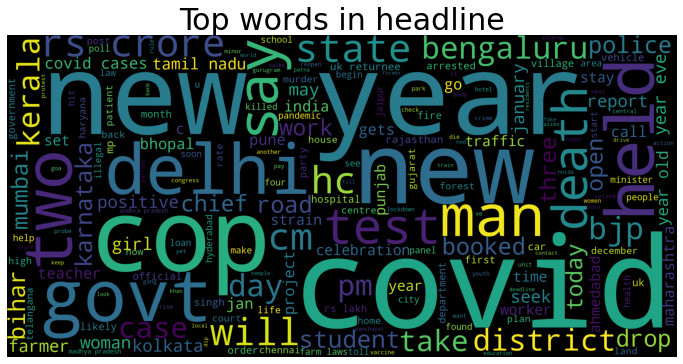

In [29]:
#Word Cloud
headlines = ' '.join(news_headlines['headline_text'].str.lower().values[-1000:])
wordcloud = WordCloud(max_font_size=None,width = 2500, height = 1200).generate(headlines)
plt.figure(figsize = (12, 16))
plt.imshow(wordcloud)
plt.title('Top words in headline',size=30)
plt.axis("off")
plt.show()

# Merging Data

In [30]:
#news_headlines.rename(columns = {'publish_date':'Date'}, inplace = True) 

data_merged = pd.merge(stock_price, news_headlines, how='inner', on='Date')
data_merged.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume,Fluctuations,Returns,headline_text
0,2001-01-02,1.4375,1.562500,1.3125,1.4375,1.297475,26600,Fall,-0.079999,status quo will not be disturbed at ayodhya s...
1,2001-01-02,1.4375,1.562500,1.3125,1.4375,1.297475,26600,Fall,-0.079999,fissures in hurriyat over pak visit
2,2001-01-02,1.4375,1.562500,1.3125,1.4375,1.297475,26600,Fall,-0.079999,america's unwanted heading for india
3,2001-01-02,1.4375,1.562500,1.3125,1.4375,1.297475,26600,Fall,-0.079999,for bigwigs it is destination goa
4,2001-01-02,1.4375,1.562500,1.3125,1.4375,1.297475,26600,Fall,-0.079999,extra buses to clear tourist traffic
...,...,...,...,...,...,...,...,...,...,...
2278147,2020-12-31,31.0000,31.540001,30.9100,31.3200,31.230515,53200,Rise,0.012282,nris reach singhu offer help to farmers
2278148,2020-12-31,31.0000,31.540001,30.9100,31.3200,31.230515,53200,Rise,0.012282,navjot singh sidhu tweets apology says 'wore ...
2278149,2020-12-31,31.0000,31.540001,30.9100,31.3200,31.230515,53200,Rise,0.012282,azim premji organisation's name misused to che...
2278150,2020-12-31,31.0000,31.540001,30.9100,31.3200,31.230515,53200,Rise,0.012282,get govt nod to probe officials mp to agencies


In [31]:
data_merged = data_merged[data_merged['Date']>='2015-01-01']
data_merged = data_merged.dropna(how='any',axis=0) #dropping null entries in our data
data_merged = data_merged.drop_duplicates() #dropping duplicate values
data_merged

,Date,Open,High,Low,Close,Adj Close,Volume,Fluctuations,Returns,headline_text
1366020,2015-01-02,20.950001,20.980000,20.02,20.16,18.882591,42300,Rise,-0.037709,drink smart with these party tips
1366021,2015-01-02,20.950001,20.980000,20.02,20.16,18.882591,42300,Rise,-0.037709,how to say sorry to your kid
1366022,2015-01-02,20.950001,20.980000,20.02,20.16,18.882591,42300,Rise,-0.037709,where to take your child on weekends
1366023,2015-01-02,20.950001,20.980000,20.02,20.16,18.882591,42300,Rise,-0.037709,why mediterranean diet is good for your heart
1366024,2015-01-02,20.950001,20.980000,20.02,20.16,18.882591,42300,Rise,-0.037709,the employee gifting guide
...,...,...,...,...,...,...,...,...,...,...
2278147,2020-12-31,31.000000,31.540001,30.91,31.32,31.230515,53200,Rise,0.012282,nris reach singhu offer help to farmers
2278148,2020-12-31,31.000000,31.540001,30.91,31.32,31.230515,53200,Rise,0.012282,navjot singh sidhu tweets apology says 'wore ...
2278149,2020-12-31,31.000000,31.540001,30.91,31.32,31.230515,53200,Rise,0.012282,azim premji organisation's name misused to che...
2278150,2020-12-31,31.000000,31.540001,30.91,31.32,31.230515,53200,Rise,0.012282,get govt nod to probe officials mp to agencies


In [32]:
#Resetting Index
data_merged = data_merged.reset_index()
del data_merged['index']
data_merged


,Date,Open,High,Low,Close,Adj Close,Volume,Fluctuations,Returns,headline_text
0,2015-01-02,20.950001,20.980000,20.02,20.16,18.882591,42300,Rise,-0.037709,drink smart with these party tips
1,2015-01-02,20.950001,20.980000,20.02,20.16,18.882591,42300,Rise,-0.037709,how to say sorry to your kid
2,2015-01-02,20.950001,20.980000,20.02,20.16,18.882591,42300,Rise,-0.037709,where to take your child on weekends
3,2015-01-02,20.950001,20.980000,20.02,20.16,18.882591,42300,Rise,-0.037709,why mediterranean diet is good for your heart
4,2015-01-02,20.950001,20.980000,20.02,20.16,18.882591,42300,Rise,-0.037709,the employee gifting guide
...,...,...,...,...,...,...,...,...,...,...
911818,2020-12-31,31.000000,31.540001,30.91,31.32,31.230515,53200,Rise,0.012282,nris reach singhu offer help to farmers
911819,2020-12-31,31.000000,31.540001,30.91,31.32,31.230515,53200,Rise,0.012282,navjot singh sidhu tweets apology says 'wore ...
911820,2020-12-31,31.000000,31.540001,30.91,31.32,31.230515,53200,Rise,0.012282,azim premji organisation's name misused to che...
911821,2020-12-31,31.000000,31.540001,30.91,31.32,31.230515,53200,Rise,0.012282,get govt nod to probe officials mp to agencies


In [33]:
# Recheck the count
print(data_merged.count())

Date             911823
Open             911823
High             911823
Low              911823
Close            911823
Adj Close        911823
Volume           911823
Fluctuations     911823
Returns          911823
headline_text    911823
dtype: int64


# Sentimental Analysis 

In [34]:
data_merged['sentiment'] = data_merged['headline_text'].apply(lambda x: TextBlob(x).sentiment[0])
data_merged.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Fluctuations,Returns,headline_text,sentiment
0,2015-01-02,20.950001,20.98,20.02,20.16,18.882591,42300,Rise,-0.037709,drink smart with these party tips,0.214286
1,2015-01-02,20.950001,20.98,20.02,20.16,18.882591,42300,Rise,-0.037709,how to say sorry to your kid,-0.500000
2,2015-01-02,20.950001,20.98,20.02,20.16,18.882591,42300,Rise,-0.037709,where to take your child on weekends,0.000000
3,2015-01-02,20.950001,20.98,20.02,20.16,18.882591,42300,Rise,-0.037709,why mediterranean diet is good for your heart,0.700000
4,2015-01-02,20.950001,20.98,20.02,20.16,18.882591,42300,Rise,-0.037709,the employee gifting guide,0.000000


In [35]:
sid = vader()
data_merged['x'] = data_merged['headline_text'].apply(lambda x: sid.polarity_scores(x))
#data_merged.head()
data_merged['compound'] =data_merged['x'].apply(lambda dict: dict['compound'])
data_merged['positive'] = data_merged['x'].apply(lambda dict: dict['pos'])
data_merged['negative'] = data_merged['x'].apply(lambda dict: dict['neg'])
data_merged['neutral'] = data_merged['x'].apply(lambda dict: dict['neu'])
data_merged = data_merged.drop('x',axis=1)
data_merged

,Date,Open,High,Low,Close,Adj Close,Volume,Fluctuations,Returns,headline_text,sentiment,compound,positive,negative,neutral
0,2015-01-02,20.950001,20.980000,20.02,20.16,18.882591,42300,Rise,-0.037709,drink smart with these party tips,0.214286,0.6597,0.574,0.000,0.426
1,2015-01-02,20.950001,20.980000,20.02,20.16,18.882591,42300,Rise,-0.037709,how to say sorry to your kid,-0.500000,-0.0772,0.000,0.178,0.822
2,2015-01-02,20.950001,20.980000,20.02,20.16,18.882591,42300,Rise,-0.037709,where to take your child on weekends,0.000000,0.0000,0.000,0.000,1.000
3,2015-01-02,20.950001,20.980000,20.02,20.16,18.882591,42300,Rise,-0.037709,why mediterranean diet is good for your heart,0.700000,0.4404,0.293,0.000,0.707
4,2015-01-02,20.950001,20.980000,20.02,20.16,18.882591,42300,Rise,-0.037709,the employee gifting guide,0.000000,0.0000,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911818,2020-12-31,31.000000,31.540001,30.91,31.32,31.230515,53200,Rise,0.012282,nris reach singhu offer help to farmers,0.000000,0.4215,0.432,0.000,0.568
911819,2020-12-31,31.000000,31.540001,30.91,31.32,31.230515,53200,Rise,0.012282,navjot singh sidhu tweets apology says 'wore ...,0.000000,0.0516,0.130,0.000,0.870
911820,2020-12-31,31.000000,31.540001,30.91,31.32,31.230515,53200,Rise,0.012282,azim premji organisation's name misused to che...,0.000000,-0.4588,0.000,0.250,0.750
911821,2020-12-31,31.000000,31.540001,30.91,31.32,31.230515,53200,Rise,0.012282,get govt nod to probe officials mp to agencies,0.000000,0.0000,0.000,0.000,1.000


In [36]:
#Price Indication (Price Movement)
#lies between 0 to 1
data_merged['Price Indication'] = np.where(data_merged['Close'].shift(-1)>data_merged['Close'],1,0)
data_merged.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Fluctuations,Returns,headline_text,sentiment,compound,positive,negative,neutral,Price Indication
0,2015-01-02,20.950001,20.98,20.02,20.16,18.882591,42300,Rise,-0.037709,drink smart with these party tips,0.214286,0.6597,0.574,0.000,0.426,0
1,2015-01-02,20.950001,20.98,20.02,20.16,18.882591,42300,Rise,-0.037709,how to say sorry to your kid,-0.500000,-0.0772,0.000,0.178,0.822,0
2,2015-01-02,20.950001,20.98,20.02,20.16,18.882591,42300,Rise,-0.037709,where to take your child on weekends,0.000000,0.0000,0.000,0.000,1.000,0
3,2015-01-02,20.950001,20.98,20.02,20.16,18.882591,42300,Rise,-0.037709,why mediterranean diet is good for your heart,0.700000,0.4404,0.293,0.000,0.707,0
4,2015-01-02,20.950001,20.98,20.02,20.16,18.882591,42300,Rise,-0.037709,the employee gifting guide,0.000000,0.0000,0.000,0.000,1.000,0


## Training and testing 

In [40]:
x = data_merged[['sentiment','Open','High','Low','Close','Adj Close','compound','positive','negative','neutral']]
y = data_merged['Price Indication']

In [41]:
#Dividing data into Training and Test sets with ratio 80% AND 20%

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)

(729458, 10)
(182365, 10)


In [42]:
#DecisionTreeRegressor Model
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

predictions = dtr.predict(x_test)
print('Mean Squared error: ',mean_squared_error(predictions,y_test))

Mean Squared error:  0.0013192242760269284


In [43]:
#LGBMRegressor Model

gbm = lightgbm.LGBMRegressor()
gbm.fit(x_train, y_train)

predictions = gbm.predict(x_test)
print('Mean Squared error: ',mean_squared_error(predictions, y_test))

Mean Squared error:  0.0007688320896342009


In [44]:
#AdaBoostRegressor Model

adb = AdaBoostRegressor()
adb.fit(x_train, y_train)

predictions = adb.predict(x_test)
print('Mean Squared error: ',mean_squared_error(predictions, y_test))

Mean Squared error:  0.0007679690160821722


###  Conclusion

**Mean Squared error** of 
>**DecisionTreeRegressor Model** is 0.001274746134486371 <br>
>**LGBMRegressor Model** is 0.0007688320896342009 <br>
>**AdaBoostRegressor Model** is 0.0007676971314068422

It shows ***AdaBoostRegressor Model***  shows a better performance than the others.

### ***Task Completed***